In [1]:
import numpy as np
import torch
import random
import copy
import matplotlib.pyplot as plt

In [2]:
from load_data import *

In [3]:
X_tr, X_te, y_tr, y_te, xs_tr, xs_te = load_adult_data(svm=False,random_state=42)

for others min:  0 and max:  1


In [4]:
pos_rt = 0.1
n_pos = int(len(y_tr)*pos_rt)

rs = 3
random.seed(rs)

r_idxs = list(range(len(y_tr)))
random.shuffle(r_idxs)

xs_trp = copy.deepcopy(xs_tr)
xs_trp[r_idxs[:n_pos]] = 1-xs_tr[r_idxs[:n_pos]]

In [5]:
print(r_idxs[:10])

[20431, 9027, 15269, 11398, 23738, 5378, 29632, 15796, 29551, 30110]


In [6]:
def poison_Z(xs,pos_rt = 0.1, rs = 3):
    n_pos = int(len(xs)*pos_rt)
    random.seed(rs)
    r_idxs = list(range(len(xs)))
    random.shuffle(r_idxs)
    xsp = copy.deepcopy(xs)
    xsp[r_idxs[:n_pos]] = 1-xs_tr[r_idxs[:n_pos]]
    return xsp

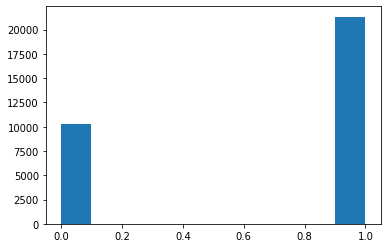

<Figure size 432x288 with 0 Axes>

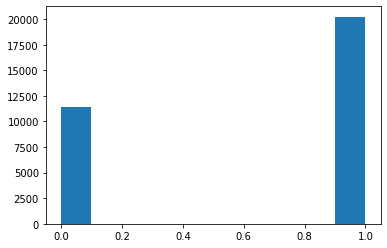

<Figure size 432x288 with 0 Axes>

In [7]:
plt.figure()
plt.hist(xs_tr.flatten())
plt.show()
plt.figure()
plt.hist(xs_trp.flatten())
plt.figure()

In [8]:
from fairNN_train import *

In [9]:
xs_tep =  poison_Z(xs_te,pos_rt = 0.1, rs = 3)

In [10]:
train_loader, test_loader = make_dataloaders(X_tr, X_te, y_tr, y_te, xs_tr, xs_te)
_, testp_loader = make_dataloaders(X_tr, X_te, y_tr, y_te, xs_tr, xs_tep)

In [11]:
n_features = train_loader.dataset.tensors[0].shape[1]
clf = Classifier(n_features=n_features)
clf_criterion = nn.BCELoss()
clf_optimizer = optim.Adam(clf.parameters())

In [12]:
pretrain_NN(clf,train_loader,clf_criterion,clf_optimizer, n_epoch = 5)

/home/srp/.pyenv/versions/pytorch15/lib/python3.8/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Classifier(
  (network): Sequential(
    (0): Linear(in_features=50, out_features=32, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=32, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=32, out_features=32, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [13]:
lambdas = torch.Tensor([30])
adv = Adversary(xs_tr.shape[1])
adv_criterion = nn.BCELoss(reduce=False)
adv_optimizer = optim.Adam(adv.parameters())

/home/srp/.pyenv/versions/pytorch15/lib/python3.8/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


In [14]:
pretrain_adv(clf,adv,train_loader,adv_criterion,adv_optimizer,lambdas, n_epoch = 5)

Adversary(
  (network): Sequential(
    (0): Linear(in_features=1, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [15]:
clf, adv = train_FNN(clf, adv, train_loader,test_loader, clf_criterion, adv_criterion,clf_optimizer,adv_optimizer, lambdas, n_epoch = 30)

/home/srp/.pyenv/versions/pytorch15/lib/python3.8/site-packages/torch/nn/modules/loss.py:516: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


test for epoch: 1
Overall accuracy: 0.8466868135918036
disparate impact:  34.667370062580986
disparate misclassification rate:  72.88967491182211
disparate false positive rate: 27.733919792516552
disparate false negative rate: 97.77827050997782
equalized opportunity for 0.0 : 27.733919792516552
equalized opportunity for 1.0 : 98.12647245802324
loss function:  bce_loss
loss value for group 0: 0.1805673986673355
loss value for group 1: 0.40586429834365845
test for epoch: 2
Overall accuracy: 0.8473501879560699
disparate impact:  37.59117850532851
disparate misclassification rate:  72.02166685938946
disparate false positive rate: 34.098380878951424
disparate false negative rate: 98.7116085372202
equalized opportunity for 0.0 : 34.098380878951424
equalized opportunity for 1.0 : 99.17022881569021
loss function:  bce_loss
loss value for group 0: 0.1892395317554474
loss value for group 1: 0.3991840183734894
test for epoch: 3
Overall accuracy: 0.8460971474902337
disparate impact:  40.1857864620

equalized opportunity for 0.0 : 47.76322531061867
equalized opportunity for 1.0 : 59.68909139640848
loss function:  bce_loss
loss value for group 0: 0.4039948880672455
loss value for group 1: 0.4752703011035919
test for epoch: 18
Overall accuracy: 0.7813812928429277
disparate impact:  78.83794085616151
disparate misclassification rate:  86.52152506897536
disparate false positive rate: 44.32532942497877
disparate false negative rate: 47.648846772751654
equalized opportunity for 0.0 : 44.32532942497877
equalized opportunity for 1.0 : 58.719864655293954
loss function:  bce_loss
loss value for group 0: 0.3864562213420868
loss value for group 1: 0.4860730469226837
test for epoch: 19
Overall accuracy: 0.7902999926291737
disparate impact:  81.50915392409726
disparate misclassification rate:  84.90828660025072
disparate false positive rate: 44.967397181844206
disparate false negative rate: 45.80205969628208
equalized opportunity for 0.0 : 44.967397181844206
equalized opportunity for 1.0 : 56.4

disparate misclassification rate:  79.16406851766268
disparate false positive rate: 58.42342342342343
disparate false negative rate: 59.542008071419836
equalized opportunity for 0.0 : 58.42342342342343
equalized opportunity for 1.0 : 54.85928705440901
loss function:  bce_loss
loss value for group 0: 0.24742548167705536
loss value for group 1: 0.5338260531425476
test for epoch: 35
Overall accuracy: 0.8153608019458981
disparate impact:  86.23956655243941
disparate misclassification rate:  78.57203958996111
disparate false positive rate: 67.89134894249133
disparate false negative rate: 59.49868073878628
equalized opportunity for 0.0 : 67.89134894249133
equalized opportunity for 1.0 : 55.95408895265423
loss function:  bce_loss
loss value for group 0: 0.24443623423576355
loss value for group 1: 0.5248772501945496
test for epoch: 36
Overall accuracy: 0.8139603449546694
disparate impact:  87.23363029595947
disparate misclassification rate:  78.83647092961283
disparate false positive rate: 65.

In [19]:
for rt in [0.0,0.1,0.2,0.3]:
    print("="*20)
    print("poisoned ratio: ", rt)
    print("="*20)
    xs_tep =  poison_Z(xs_te,pos_rt =rt, rs = 3)
    _, testp_loader = make_dataloaders(X_tr, X_te, y_tr, y_te, xs_tr, xs_tep)
    test_FNN(clf, testp_loader,loss_fn = 'bce',thr = 0.5)

poisoned ratio:  0.0
Overall accuracy: 0.8136655119038845
disparate impact:  94.7725821605827
disparate misclassification rate:  79.8514381270903
disparate false positive rate: 61.469194312796205
disparate false negative rate: 50.30252100840337
equalized opportunity for 0.0 : 61.469194312796205
equalized opportunity for 1.0 : 56.28972653362898
loss function:  bce_loss
loss value for group 0: 0.27840960025787354
loss value for group 1: 0.4726502001285553
poisoned ratio:  0.1
Overall accuracy: 0.8149185523697207
disparate impact:  94.12729181628998
disparate misclassification rate:  81.95120103684037
disparate false positive rate: 68.5469351322624
disparate false negative rate: 63.835418738838136
equalized opportunity for 0.0 : 68.5469351322624
equalized opportunity for 1.0 : 64.18980619353059
loss function:  bce_loss
loss value for group 0: 0.3013906180858612
loss value for group 1: 0.4671308100223541
poisoned ratio:  0.2
Overall accuracy: 0.8166875506744306
disparate impact:  89.983616